# Data Sampling
## The Normal Approximation for Probability Histograms

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [41]:
# Import libraries
from __future__ import absolute_import, division, print_function

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

import sys
sys.path.append('tools/')

import numpy as np
import pandas as pd

# Graphing Libraries
import matplotlib.pyplot as pyplt
import seaborn as sns
sns.set_style("white")  

# Configure for presentation
np.set_printoptions(threshold=50, linewidth=50)
import matplotlib as mpl
mpl.rc('font', size=16)

from IPython.display import display

To get our feet wet, let's take a look at the city of San Francisco's bike sharing data

In [3]:
trips = pd.read_csv('data/trip.csv')
commute = trips.where(trips.Duration < 1800)

In [4]:
display(trips.head())
display(commute.head())

,Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code
0,913460,765,8/31/2015 23:26,Harry Bridges Plaza (Ferry Building),50,8/31/2015 23:39,San Francisco Caltrain (Townsend at 4th),70,288,Subscriber,2139
1,913459,1036,8/31/2015 23:11,San Antonio Shopping Center,31,8/31/2015 23:28,Mountain View City Hall,27,35,Subscriber,95032
2,913455,307,8/31/2015 23:13,Post at Kearny,47,8/31/2015 23:18,2nd at South Park,64,468,Subscriber,94107
3,913454,409,8/31/2015 23:10,San Jose City Hall,10,8/31/2015 23:17,San Salvador at 1st,8,68,Subscriber,95113
4,913453,789,8/31/2015 23:09,Embarcadero at Folsom,51,8/31/2015 23:22,Embarcadero at Sansome,60,487,Customer,9069


,Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code
0,913460.0,765.0,8/31/2015 23:26,Harry Bridges Plaza (Ferry Building),50.0,8/31/2015 23:39,San Francisco Caltrain (Townsend at 4th),70.0,288.0,Subscriber,2139
1,913459.0,1036.0,8/31/2015 23:11,San Antonio Shopping Center,31.0,8/31/2015 23:28,Mountain View City Hall,27.0,35.0,Subscriber,95032
2,913455.0,307.0,8/31/2015 23:13,Post at Kearny,47.0,8/31/2015 23:18,2nd at South Park,64.0,468.0,Subscriber,94107
3,913454.0,409.0,8/31/2015 23:10,San Jose City Hall,10.0,8/31/2015 23:17,San Salvador at 1st,8.0,68.0,Subscriber,95113
4,913453.0,789.0,8/31/2015 23:09,Embarcadero at Folsom,51.0,8/31/2015 23:22,Embarcadero at Sansome,60.0,487.0,Customer,9069


For this analysis, we are limiting ourselves to bike sharing trips that are leess that 30 minutes, because that is what comes free as part of the bike sharing program for the city of San Francisco.
We want to draw a histogram of the duration to understand exactly how long trips typically take. 

To do that, I am going to start off making bins of the data. For example, restricting the sampling to every minutes.

In [5]:
half_hour = 30 * 60 # 30 minutes times 60 seconds
bins = np.arange(1, half_hour+1, 60)

In [6]:
pyplt.rcParams['figure.figsize'] = (4, 3)

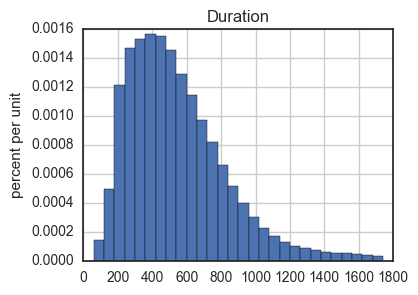

In [7]:
commute.hist('Duration', bins=bins, normed=True)
pyplt.ylabel('percent per unit');

In [8]:
def bin_frequency(k):
    bins = np.arange(1, half_hour+1, k)
    commute.hist('Duration', bins=bins, normed=True)

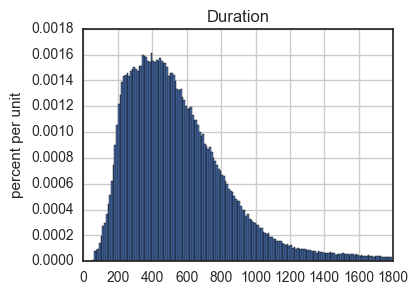

In [9]:
bin_frequency(10)
pyplt.ylabel('percent per unit');

In [10]:
weather = pd.read_csv('data/weather.csv')
sf = weather.where(weather.Zip == 94107)

In [11]:
sf = sf[[0, 1, 3]]
sf.columns = [u'PDT', 'High', 'Low']

In [12]:
sf.head()

,PDT,High,Low
0,9/1/2014,83.0,57.0
1,9/2/2014,72.0,60.0
2,9/3/2014,76.0,61.0
3,9/4/2014,74.0,61.0
4,9/5/2014,72.0,60.0


In [13]:
def axis_tick_frequency(ax, axis, freq):
    """The frequency of the y axis tick marks
        Attributes
        ----------
        ax: matplotlib axis object
        axis: char eithher 'y' or 'x'
        freq: int, the integer value of which the range moves
    """
    
    if axis == 'y':
        start, end = ax.get_ylim()
        ax.yaxis.set_ticks(np.arange(start, end, freq))
    elif axis == 'x':
        start, end = ax.get_xlim()
        ax.xaxis.set_ticks(np.arange(start, end, freq))
    else:
        raise ValueError('{argument} is not a valid axis object'.format(argument=repr(axis)))

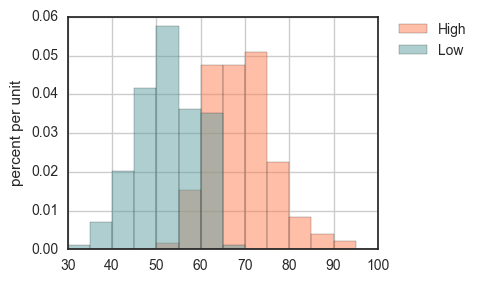

In [14]:
ax = sf[[1,2]].plot.hist(color =['coral','cadetblue'], bins=np.arange(30, 101, 5), normed=True, alpha = 0.5)
pyplt.ylabel('percent per unit')
pyplt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
pyplt.grid(True);

#### Question:
 - What proportion of days had a low temp greater than 45 degrees?
 
#### Answer:



In [15]:
sf.where(sf.Low >= 45).Low.count() / 365 * 100

85.753424657534254

#### Question:
 - Figure out the distribution of the days of the year where temperature swings betweens the highs and the lows.

#### Answer:

In [16]:
sf['diff'] = sf.High - sf.Low

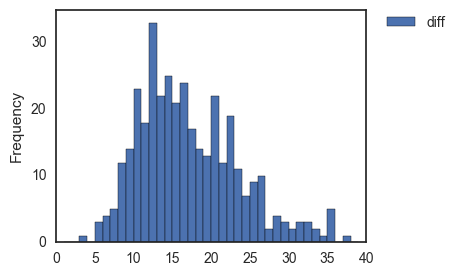

In [17]:
ax = sf['diff'].plot.hist(bins=np.arange(0, 40, 1))
axis_tick_frequency(ax, 'y', 10)
pyplt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);


## Deterministic Sampling

In [18]:
top = pd.read_csv('data/top_movies.csv')

In [19]:
top.head()

,Title,Studio,Gross,Gross (Adjusted),Year
0,Star Wars: The Force Awakens,Buena Vista (Disney),906723418,906723400,2015
1,Avatar,Fox,760507625,846120800,2009
2,Titanic,Paramount,658672302,1178627900,1997
3,Jurassic World,Universal,652270625,687728000,2015
4,Marvel's The Avengers,Buena Vista (Disney),623357910,668866600,2012


Let's make a deterministic sample. We will sample every 20th top grossing movie

In [20]:
interval = 20
sample = arange(0, len(top), interval)

In [21]:
df = pd.DataFrame()
for i in sample:
    df = df.append(top.ix[i, :])

In [22]:
df

,Gross,Gross (Adjusted),Studio,Title,Year
0,906723418.0,9.067234e+08,Buena Vista (Disney),Star Wars: The Force Awakens,2015.0
20,402111870.0,4.689381e+08,Paramount/Dreamworks,Transformers: Revenge of the Fallen,2009.0
40,322719944.0,4.080906e+08,Paramount/Dreamworks,Shrek the Third,2007.0
60,291710957.0,3.930331e+08,Buena Vista (Disney),"The Chronicles of Narnia: The Lion, the Witch ...",2005.0
80,242829261.0,3.503507e+08,Universal,Bruce Almighty,2003.0
100,198676459.0,1.757788e+09,MGM,Gone with the Wind,1939.0
120,167780960.0,3.628229e+08,Buena Vista (Disney),Three Men and a Baby,1987.0
140,125049125.0,3.698653e+08,UA,Rocky III,1982.0
160,94213184.0,3.532612e+08,Paramount,Saturday Night Fever,1977.0
180,52223306.0,3.483432e+08,Columbia,Funny Girl,1968.0


## Probability Sampling

A *population* is the set of all elements from whom a sample will be drawn. A *probability sample* is one for which it is possible to calculate, before the sample is drawn, the chance with which any subset of elements will enter the sample. In a probability sample, all elements need not have the same chance of being chosen.

Now let's do probabilistic sampling of the top movies. When we do a probabilistic sample like this, we call it a **"systematic sample."**


In [23]:
start = np.random.choice(np.arange(interval))
sample = np.arange(start, len(top), interval)

df = pd.DataFrame()
for i in sample:
    df = df.append(top.ix[i, :])

In [24]:
df

,Gross,Gross (Adjusted),Studio,Title,Year
14,422783777.0,7.755739e+08,Buena Vista (Disney),The Lion King,1994.0
34,337135885.0,3.543240e+08,Lionsgate,The Hunger Games: Mockingjay - Part 1,2014.0
54,301959197.0,3.520988e+08,Warner Bros.,Harry Potter and the Half-Blood Prince,2009.0
74,250863268.0,3.222619e+08,Fox,Night at the Museum,2006.0
94,216540909.0,3.979995e+08,Dreamworks,Saving Private Ryan,1998.0
114,176484651.0,3.260640e+08,Fox,There's Something About Mary,1998.0
134,141600000.0,5.210453e+08,Universal,National Lampoon's Animal House,1978.0
154,103290500.0,3.340622e+08,Fox,9 to 5,1980.0
174,65500000.0,1.139700e+09,Paramount,The Ten Commandments,1956.0
194,23650000.0,4.785000e+08,RKO,The Best Years of Our Lives,1946.0


#### Question:
- What is the probability that the *Rush Hour 2* ends up in the sample we have systematically chosen?

#### Answer:
- This is depends solely on the the chance that the first movie chosen from the dataset is *The Dark Knight Rises* and that has a chance of 1 in 20, i.e., 5%. 


### Uniform Sample
A uniform sample is a sample drawn at random without replacements

In [25]:
def sample(num_sample, top):
    """
    Create a random sample from a table
    
    Attributes
    ---------
    num_sample: int
    top: dataframe
    
    Returns a random subset of table index
    """
    df_index = []

    for i in np.arange(0, num_sample, 1):

        # pick randomly from the whole table
        sample_index = np.random.randint(0, len(top))

        # store index
        df_index.append(sample_index)
        
    return df_index

def sample_no_replacement(num_sample, top):
    """
    Create a random sample from a table
    
    Attributes
    ---------
    num_sample: int
    top: dataframe
    
    Returns a random subset of table index
    """
    df_index = []
    lst = np.arange(0, len(top), 1)

    for i in np.arange(0, num_sample, 1):

        # pick randomly from the whole table
        sample_index = np.random.choice(lst)

        lst = np.setdiff1d(lst,[sample_index])
        df_index.append(sample_index)
            
    return df_index



In [28]:
index_ = sample(35, top)
df = top.ix[index_, :]
df.sort_values(by='Title')

,Title,Studio,Gross,Gross (Adjusted),Year
178,2001: A Space Odyssey,MGM,56954992,377027700,1968
99,Armageddon,Buena Vista (Disney),201578182,373929700,1998
157,Bambi,RKO,102247150,554298300,1942
106,Batman Forever,Warner Bros.,184031112,368062200,1995
80,Bruce Almighty,Universal,242829261,350350700,2003
155,Butch Cassidy and the Sundance Kid,Fox,102308889,613853300,1969
162,Cinderella (1950),Disney,93141149,547050200,1950
177,Cleopatra (1963),Fox,57777778,584496100,1963
103,Grease,Paramount,188755690,669632000,1978
22,Harry Potter and the Deathly Hallows Part 2,Warner Bros.,381011219,417512200,2011


In [29]:
index_ = sample_no_replacement(25, top)
df = top.ix[index_, :]
df.sort_values(by='Title')

,Title,Studio,Gross,Gross (Adjusted),Year
132,101 Dalmatians,Disney,144880014,869280100,1961
91,Beauty and the Beast,Buena Vista (Disney),218967620,394664300,1991
155,Butch Cassidy and the Sundance Kid,Fox,102308889,613853300,1969
85,Cast Away,Fox,233632142,364479500,2000
115,Crocodile Dundee,Paramount,174803506,401961400,1986
21,Frozen,Buena Vista (Disney),400738009,426656900,2013
100,Gone with the Wind,MGM,198676459,1757788200,1939
71,How the Grinch Stole Christmas,Universal,260044825,418529400,2000
72,Jaws,Universal,260000000,1114285700,1975
161,Lady and the Tramp,Disney,93602326,484893500,1955


## Dice

In [30]:
die = pd.DataFrame()
die["Face"] = [1,2,3,4,5,6]

In [31]:
die

,Face
0,1
1,2
2,3
3,4
4,5
5,6


## Coin

In [32]:
coin = pd.DataFrame()
coin["Face"] = [1,2]
coin

,Face
0,1
1,2


We can simulate the act of rolling dice by just pulling out rows

In [33]:
index_ = sample(3, die)
df = die.ix[index_, :]
df

,Face
4,5
0,1
4,5


In [34]:
index_ = sample(1, coin)
df = coin.ix[index_, :]
df

,Face
1,2


In [35]:
def dice_hist(n):
    """Construct histogram of n simulated dice rolls
    
    Attributes
    -----------
    n: int 
    """
    
    if n > 0:
        dice_bins = np.arange(0.5, 7, 1) 
        index_ = sample(n, die)
        df = die.ix[index_, :]
        df.plot.hist(bins=dice_bins, normed=True)
        pyplt.ylabel('percent per unit')
        pyplt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
    else:
        raise ValueError('n has to be greater than 0')

        
def dice_sum_hist(n):
    """
    Construct histogram of rolling a pair of dice and plot the sum of the faces
    
    Attributes
    -----------
    num_die: int (number of dice)
    n: int 
    """
    
    if n > 0:
        d1 = np.random.randint(1, 6 + 1, n)
        d2 = np.random.randint(1, 6 + 1, n)
        data = d1 + d2

        bins = np.arange(data.min()-0.5, data.max()+1, 1) 
        pyplt.hist(data, bins=bins, normed=True)
        pyplt.ylabel('percent per unit')
        pyplt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
    else:
        raise ValueError('n has to be greater than 0')
        

def dice_prod_hist(n):
    """
    Construct histogram of rolling a pair of dice and plotting the product of the faces.
    
    Attributes
    -----------
    num_die: int (number of dice)
    n: int 
    """
    
    if n > 0:
        d1 = np.random.randint(1, 6 + 1, n)
        d2 = np.random.randint(1, 6 + 1, n)
        data = d1 * d2

        bins = np.arange(data.min()-0.5, data.max()+1, 1) 
        pyplt.hist(data, bins=bins, normed=True)
        pyplt.ylabel('percent per unit')
        pyplt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
    else:
        raise ValueError('n has to be greater than 0')
        


### Probability Histogram



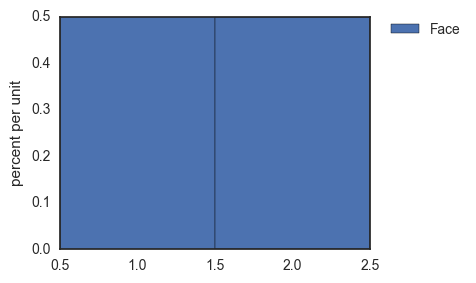

In [59]:
low, high = coin.Face.min() - 0.5, coin.Face.max() + 1
bins = np.arange(low, high, 1)

# norm the histogram to give us the density scale
coin.plot.hist(bins=bins, normed=True)
pyplt.ylabel('percent per unit')
pyplt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);


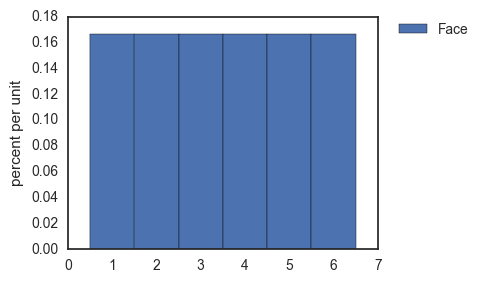

In [60]:
low, high = die.Face.min() - 0.5, die.Face.max() + 1
bins = np.arange(low, high, 1)

# norm the histogram to give us the density scale
die.plot.hist(bins=bins, normed=True)
pyplt.ylabel('percent per unit')
pyplt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);


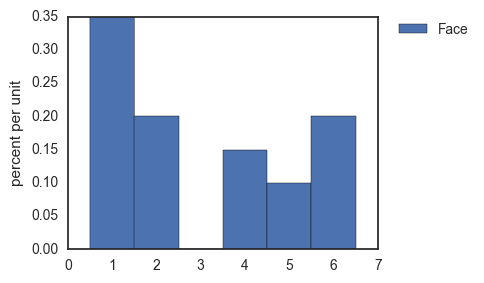

In [38]:
dice_hist(20)

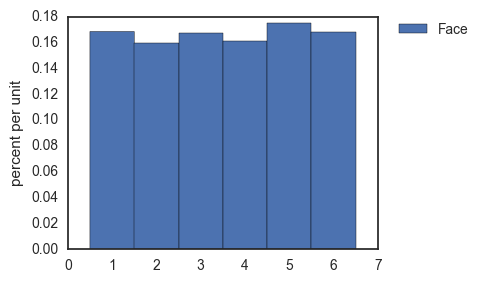

In [39]:
dice_hist(10000)

Plot the sum of dices

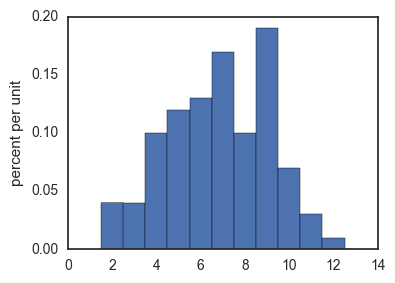

In [44]:
n = 100
dice_sum_hist(n)

Roll two six sided dice 1000 times and sum the results:

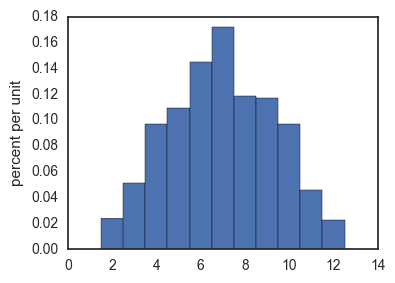

In [47]:
n = 1000
dice_sum_hist(n)

### Gaps in the histogram?
The graph below helps us see that the probability histograms can have gaps. The graph below plots the probability histogram of the product of a pair of dice. The smallest number is 1, while the largest number is 36. Because of the distribution of the die face, we can never get a 7, 11 and so on. 

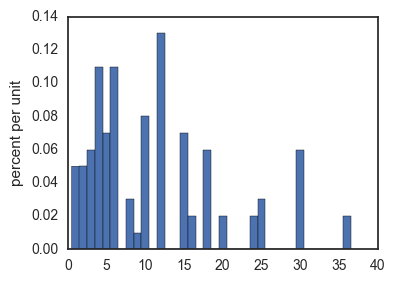

In [48]:
n = 100
dice_prod_hist(n)

### The scope of the Normal Approximation

In [56]:
box = pd.DataFrame()
box["Content"] = [1,2,3]

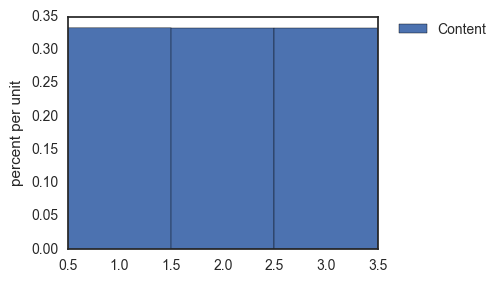

In [57]:
low, high = box.Content.min() - 0.5, box.Content.max() + 1
bins = np.arange(low, high, 1)

box.plot.hist(bins=bins, normed=True)
pyplt.ylabel('percent per unit')
pyplt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);


In [51]:
def sum_draws( n, box ):
    """
    Construct histogram for the sum of n draws from a box with replacement
    
    Attributes
    -----------
    n: int (number of draws)
    box: dataframe (the box model)
    """
    data = numpy.zeros(shape=(n,1))
    if n > 0:
        for i in range(n):
            index_ = np.random.randint(0, len(box), n)
            df = box.ix[index_, :]
            data[i] = df.Content.sum()

        bins = np.arange(data.min()-0.5, data.max()+1, 1) 
        pyplt.hist(data, bins=bins, normed=True)
        pyplt.ylabel('percent per unit')
        pyplt.xlabel('Number on ticket')
        pyplt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
    else:
        raise ValueError('n has to be greater than 0')
    
        


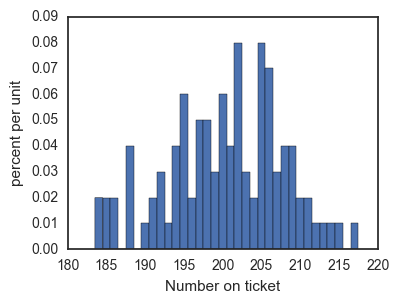

In [61]:
sum_draws(100, box)

In [71]:
box = pd.DataFrame()
box["Content"] = [0,1]

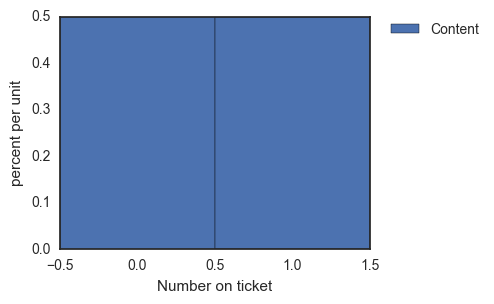

In [72]:
pyplt.rcParams['figure.figsize'] = (4, 3)

low, high = box.Content.min() - 0.5, box.Content.max() + 1
bins = np.arange(low, high, 1) 

box.plot.hist(bins=bins, normed=True)
pyplt.ylabel('percent per unit')
pyplt.xlabel('Number on ticket')
pyplt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);


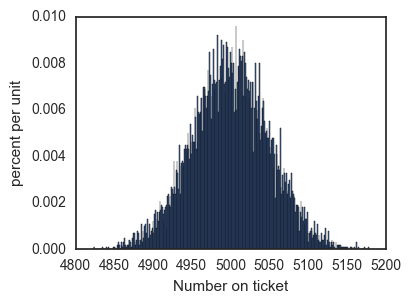

In [76]:
sum_draws(10000, box)